<a href="https://colab.research.google.com/github/nurayuasyifa/data-science-portofolio/blob/main/Credit%20Score%20Home%20Credit%20Indonesia/VIX_1_EDA_Home_Credit_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Package

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
import plotly.offline as po
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Data

In [ ]:
hci_desc= pd.read_csv('/content/drive/MyDrive/Rakamin Academy/JAP/Virtual Internship Program 1/dataset/HomeCredit_columns_description.csv',encoding='iso-8859-1')
df_sample = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/JAP/Virtual Internship Program 1/dataset/sample_submission.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/JAP/Virtual Internship Program 1/dataset/application_test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/JAP/Virtual Internship Program 1/dataset/application_train.csv')
df_bureau = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/JAP/Virtual Internship Program 1/dataset/bureau.csv')
df_bureau_balance = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/JAP/Virtual Internship Program 1/dataset/bureau_balance.csv')
df_cc_balance = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/JAP/Virtual Internship Program 1/dataset/credit_card_balance.csv')
df_prev_app = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/JAP/Virtual Internship Program 1/dataset/previous_application.csv')
df_posh_cash = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/JAP/Virtual Internship Program 1/dataset/POS_CASH_balance.csv')
df_inst = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/JAP/Virtual Internship Program 1/dataset/installments_payments.csv')

**Observation** <br>
dataset yang akan dipakai :
1. df_train
2. df_bureau
3. df_bureau_balance
4. df_cc_balance
5. df_prev_app
6. df_posh_cash
7. df_inst

## Check Data

### **Dataset application train**

In [ ]:
df_train.shape

(307511, 122)

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### **Dataset df_bureau**

In [ ]:
print(df_bureau.shape)
df_bureau.head()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


### **Dataset df_bureau_balance**

In [ ]:
print(df_bureau_balance.shape)
df_bureau_balance.head()

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


### **Dataset df_cc_balance**

In [ ]:
print(df_cc_balance.shape)
df_cc_balance.head()

(3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
df_cc_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

### **Dataset df_prev_app**


In [ ]:
print(df_prev_app.shape)
df_prev_app.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### **Dataset df_posh_cash**

In [ ]:
print(df_posh_cash.shape)
df_posh_cash.head()

(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
df_posh_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


### **Dataset df_inst**

In [ ]:
print(df_inst.shape)
df_inst.head()

(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
 df_inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


# Check Null Values

**Dataset application Train**

In [ ]:
p1 = round(100*df_train.isnull().sum()/df_train.shape[0],3).sort_values(ascending=False)
p1[p1>1]

COMMONAREA_MEDI                 69.872
COMMONAREA_AVG                  69.872
COMMONAREA_MODE                 69.872
NONLIVINGAPARTMENTS_MODE        69.433
NONLIVINGAPARTMENTS_AVG         69.433
NONLIVINGAPARTMENTS_MEDI        69.433
FONDKAPREMONT_MODE              68.386
LIVINGAPARTMENTS_MODE           68.355
LIVINGAPARTMENTS_AVG            68.355
LIVINGAPARTMENTS_MEDI           68.355
FLOORSMIN_AVG                   67.849
FLOORSMIN_MODE                  67.849
FLOORSMIN_MEDI                  67.849
YEARS_BUILD_MEDI                66.498
YEARS_BUILD_MODE                66.498
YEARS_BUILD_AVG                 66.498
OWN_CAR_AGE                     65.991
LANDAREA_MEDI                   59.377
LANDAREA_MODE                   59.377
LANDAREA_AVG                    59.377
BASEMENTAREA_MEDI               58.516
BASEMENTAREA_AVG                58.516
BASEMENTAREA_MODE               58.516
EXT_SOURCE_1                    56.381
NONLIVINGAREA_MODE              55.179
NONLIVINGAREA_AVG        

In [ ]:
p1[(p1<1) & (p1>0)]

NAME_TYPE_SUITE             0.420
OBS_30_CNT_SOCIAL_CIRCLE    0.332
DEF_30_CNT_SOCIAL_CIRCLE    0.332
OBS_60_CNT_SOCIAL_CIRCLE    0.332
DEF_60_CNT_SOCIAL_CIRCLE    0.332
EXT_SOURCE_2                0.215
AMT_GOODS_PRICE             0.090
AMT_ANNUITY                 0.004
CNT_FAM_MEMBERS             0.001
dtype: float64

In [ ]:
p1[p1==0]

CNT_CHILDREN                   0.0
FLAG_DOCUMENT_8                0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
DAYS_LAST_PHONE_CHANGE         0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_21               0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_OWN_REALTY                0.0
FLAG_DOCUMENT_13               0.0
FLAG_DOCUMENT_14               0.0
FLAG_DOCUMENT_15               0.0
FLAG_DOCUMENT_16               0.0
FLAG_DOCUMENT_17               0.0
FLAG_DOCUMENT_18               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_20               0.0
FLAG_DOCUMENT_12               0.0
AMT_CREDIT                     0.0
AMT_INCOME_TOTAL               0.0
FLAG_PHONE          

**observation :**

Drop kolom yang memiliki lebih dari 1% missing value

**Dataset bureau**

In [ ]:
p2 = round(100*df_bureau.isnull().sum()/df_bureau.shape[0],3).sort_values(ascending=False)
p2#[p2>1]

AMT_ANNUITY               71.473
AMT_CREDIT_MAX_OVERDUE    65.513
DAYS_ENDDATE_FACT         36.917
AMT_CREDIT_SUM_LIMIT      34.477
AMT_CREDIT_SUM_DEBT       15.012
DAYS_CREDIT_ENDDATE        6.150
AMT_CREDIT_SUM             0.001
CREDIT_ACTIVE              0.000
CREDIT_CURRENCY            0.000
DAYS_CREDIT                0.000
CREDIT_DAY_OVERDUE         0.000
SK_ID_BUREAU               0.000
CNT_CREDIT_PROLONG         0.000
AMT_CREDIT_SUM_OVERDUE     0.000
CREDIT_TYPE                0.000
DAYS_CREDIT_UPDATE         0.000
SK_ID_CURR                 0.000
dtype: float64

**Observation**

Drop kolom yang nilai null yang lebih dari 1%

**Dataset df_bureau_balance**

In [ ]:
df_bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

**Dataset df_cc_balance**

In [ ]:
round(100*df_cc_balance.isnull().sum()/df_cc_balance.shape[0],3).sort_values(ascending=False)

AMT_PAYMENT_CURRENT           19.998
AMT_DRAWINGS_ATM_CURRENT      19.525
CNT_DRAWINGS_POS_CURRENT      19.525
AMT_DRAWINGS_OTHER_CURRENT    19.525
AMT_DRAWINGS_POS_CURRENT      19.525
CNT_DRAWINGS_OTHER_CURRENT    19.525
CNT_DRAWINGS_ATM_CURRENT      19.525
CNT_INSTALMENT_MATURE_CUM      7.948
AMT_INST_MIN_REGULARITY        7.948
SK_ID_PREV                     0.000
AMT_TOTAL_RECEIVABLE           0.000
SK_DPD                         0.000
NAME_CONTRACT_STATUS           0.000
CNT_DRAWINGS_CURRENT           0.000
AMT_PAYMENT_TOTAL_CURRENT      0.000
AMT_RECIVABLE                  0.000
AMT_RECEIVABLE_PRINCIPAL       0.000
SK_ID_CURR                     0.000
AMT_DRAWINGS_CURRENT           0.000
AMT_CREDIT_LIMIT_ACTUAL        0.000
AMT_BALANCE                    0.000
MONTHS_BALANCE                 0.000
SK_DPD_DEF                     0.000
dtype: float64

**Dataset df_prev_app**

In [ ]:
p5 = round(100*df_prev_app.isnull().sum()/df_prev_app.shape[0],3).sort_values(ascending=False)
p5[p5>1]

RATE_INTEREST_PRIVILEGED     99.644
RATE_INTEREST_PRIMARY        99.644
RATE_DOWN_PAYMENT            53.636
AMT_DOWN_PAYMENT             53.636
NAME_TYPE_SUITE              49.120
NFLAG_INSURED_ON_APPROVAL    40.298
DAYS_FIRST_DRAWING           40.298
DAYS_FIRST_DUE               40.298
DAYS_LAST_DUE_1ST_VERSION    40.298
DAYS_LAST_DUE                40.298
DAYS_TERMINATION             40.298
AMT_GOODS_PRICE              23.082
AMT_ANNUITY                  22.287
CNT_PAYMENT                  22.286
dtype: float64

**Dataset df_posh_cash**

In [ ]:
round(100*df_posh_cash.isnull().sum()/df_posh_cash.shape[0],3).sort_values(ascending=False)

CNT_INSTALMENT           0.261
CNT_INSTALMENT_FUTURE    0.261
SK_ID_PREV               0.000
SK_ID_CURR               0.000
MONTHS_BALANCE           0.000
NAME_CONTRACT_STATUS     0.000
SK_DPD                   0.000
SK_DPD_DEF               0.000
dtype: float64

**Observations:**

menginputkan nilai pada kolom yang bernilai null

**Dataset df_inst**

In [ ]:
round(100*df_inst.isnull().sum()/df_inst.shape[0],3).sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        0.021
AMT_PAYMENT               0.021
SK_ID_PREV                0.000
SK_ID_CURR                0.000
NUM_INSTALMENT_VERSION    0.000
NUM_INSTALMENT_NUMBER     0.000
DAYS_INSTALMENT           0.000
AMT_INSTALMENT            0.000
dtype: float64

**Observations:**

menginputkan nilai pada kolom yang bernilai null

# Check Duplicate Data

In [ ]:
print('numbers of duplicate value in df_train = ',df_train.duplicated().sum())
print('numbers of duplicate value in df_bureau = ',df_bureau.duplicated().sum())
print('numbers of duplicate value in df_bureau_balance = ',df_bureau_balance.duplicated().sum())
print('numbers of duplicate value in df_cc_balance = ',df_cc_balance.duplicated().sum())
print('numbers of duplicate value in df_prev_app = ',df_prev_app.duplicated().sum())
print('numbers of duplicate value in df_posh_cash = ',df_posh_cash.duplicated().sum())
print('numbers of duplicate value in df_inst = ',df_inst.duplicated().sum())

numbers of duplicate value in df_train =  0
numbers of duplicate value in df_bureau =  0
numbers of duplicate value in df_bureau_balance =  0
numbers of duplicate value in df_cc_balance =  0
numbers of duplicate value in df_prev_app =  0
numbers of duplicate value in df_posh_cash =  0
numbers of duplicate value in df_inst =  0


# Exploratory Data Analysis (EDA)


kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses.

In [ ]:
nums = []
cats = []
for i in df_train.columns:
  if (df_train[i].dtypes == 'object'):
    cats.append(i)
  else :
    if (i == 'TARGET'):
      continue
    else:
      nums.append(i)

## **1. Loan Repayed or Not**

check imbalance data

In [ ]:
#check persentase target
df1 = df_train.groupby('TARGET').agg({'SK_ID_CURR':'count'}).rename(columns={'SK_ID_CURR':'total'}).reset_index()
df1['persentase (%)'] = round(100*df1['total']/np.sum(df1['total']),3)
df1

,TARGET,total,persentase (%)
0,0,282686,91.927
1,1,24825,8.073


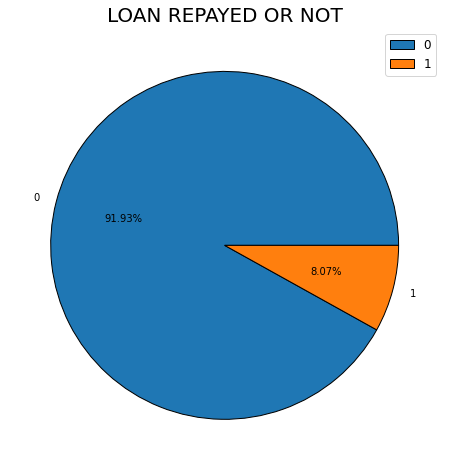

In [ ]:
plt.figure(figsize=(15,8))
plt.pie(x='persentase (%)',labels='TARGET',data = df1,autopct='%1.2f%%')
plt.title('LOAN REPAYED OR NOT',fontsize=20)
plt.legend(fontsize=12)
plt.show()

**Observations:**
- Data imbalance cukup ekstrim dengan perbandingan 92 : 8


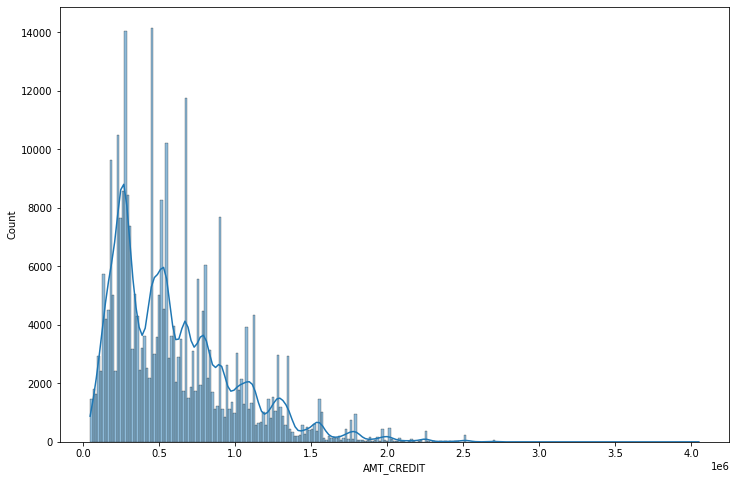

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(x='AMT_CREDIT',data=df_train)
plt.show()

## **Categorical vs Target**

In [ ]:
cats

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

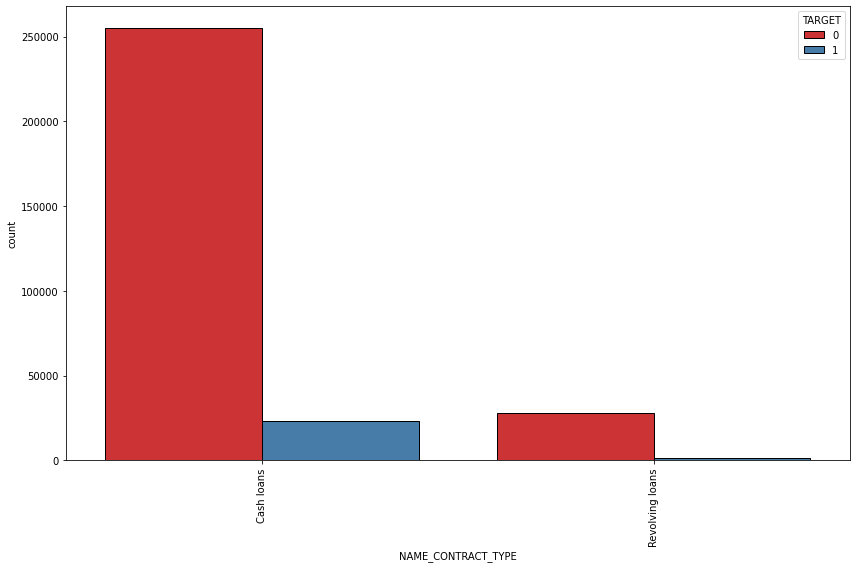

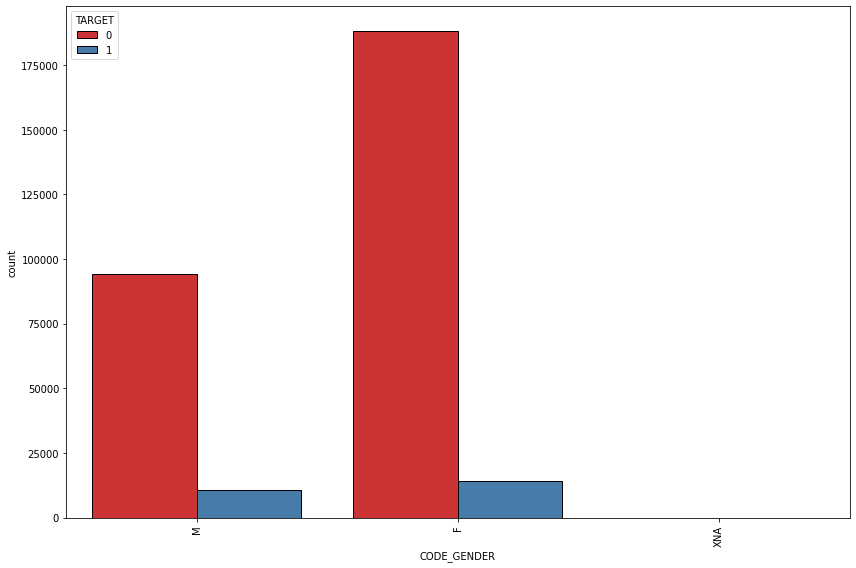

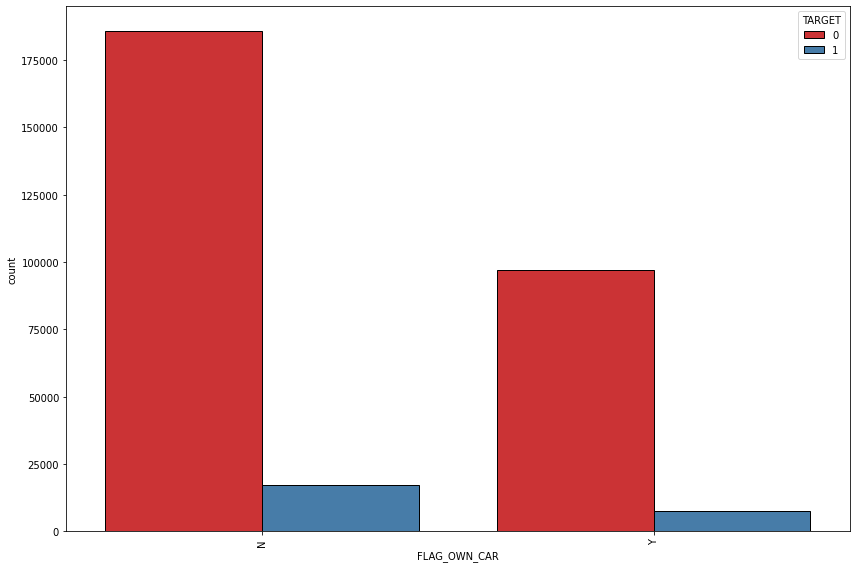

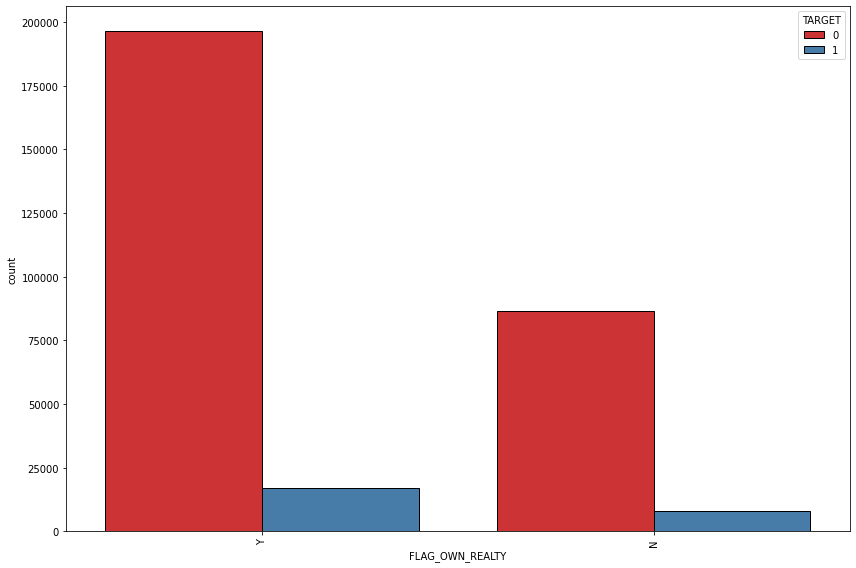

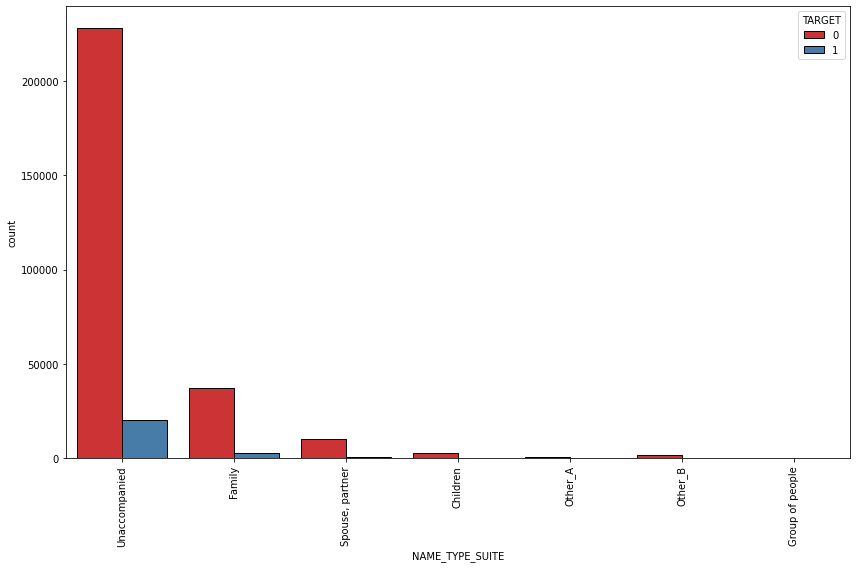

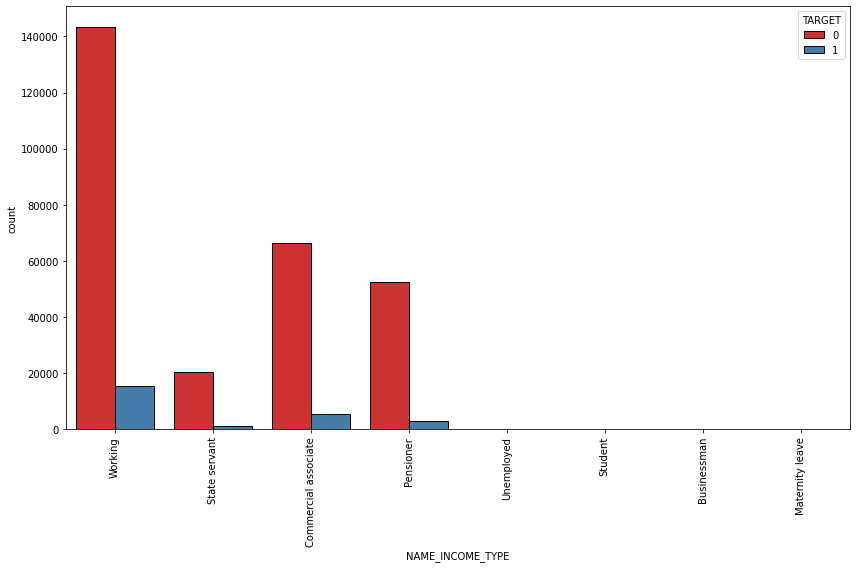

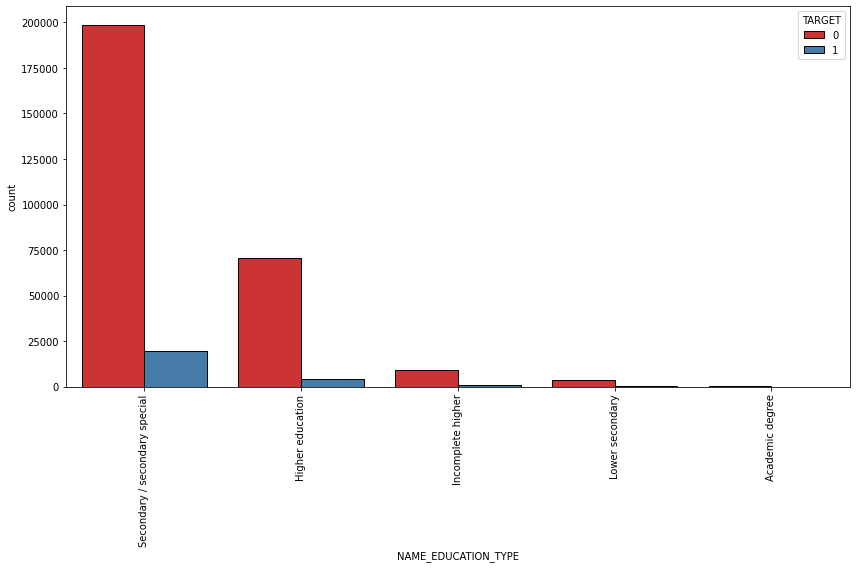

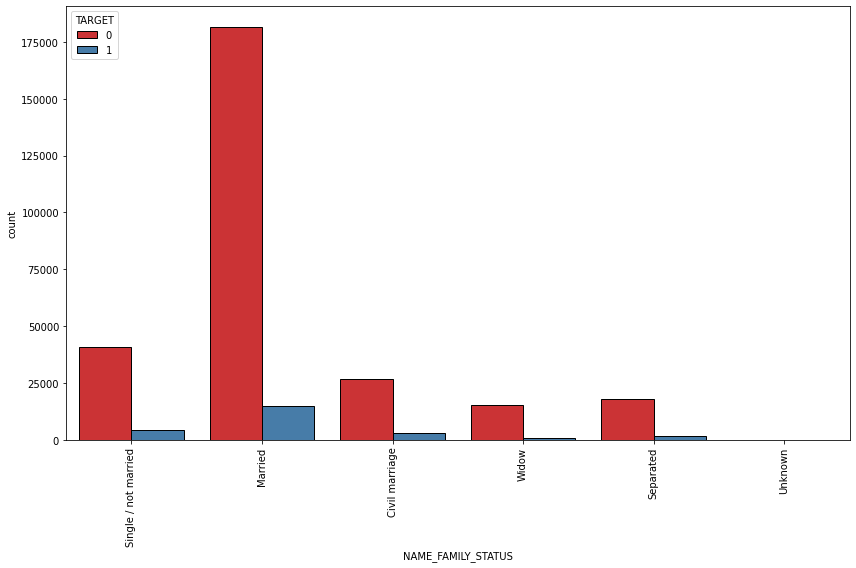

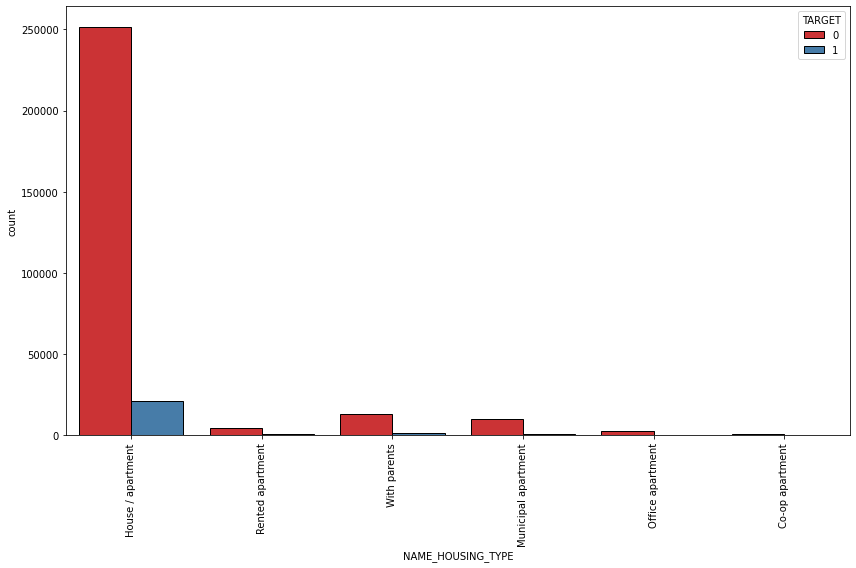

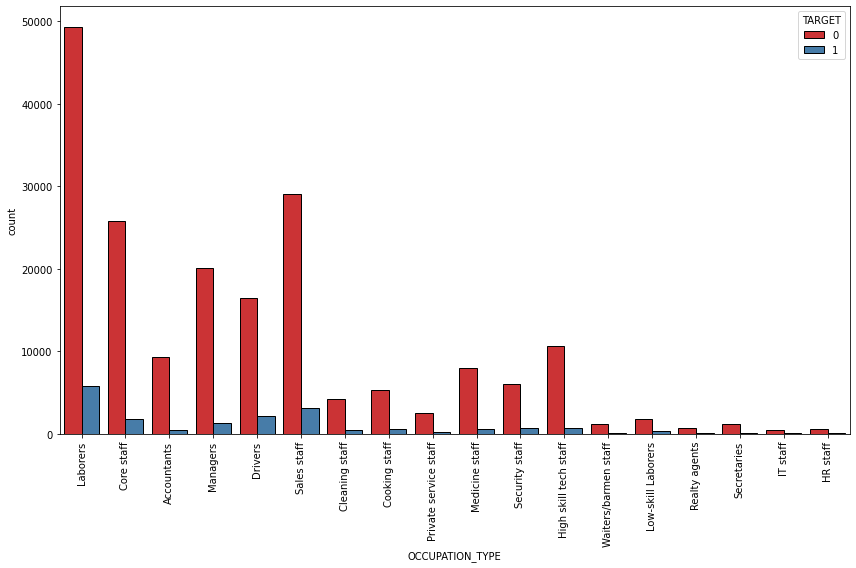

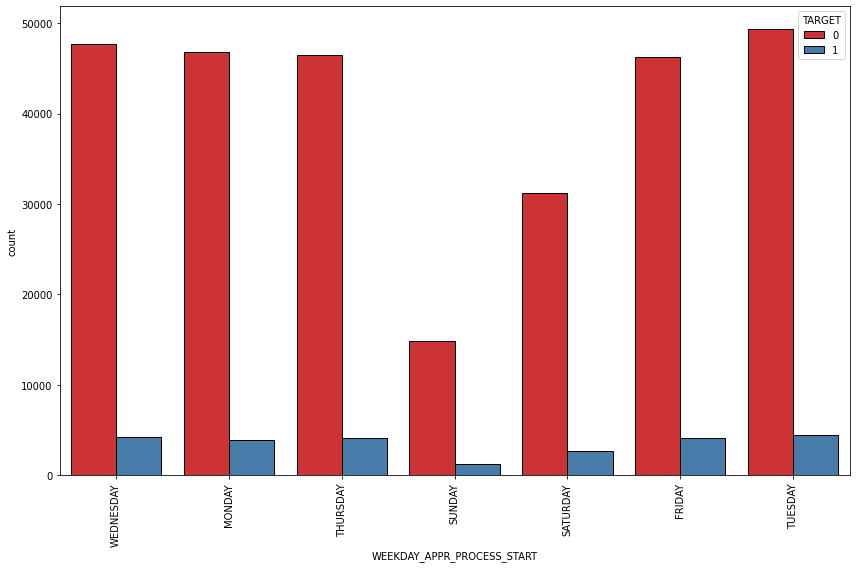

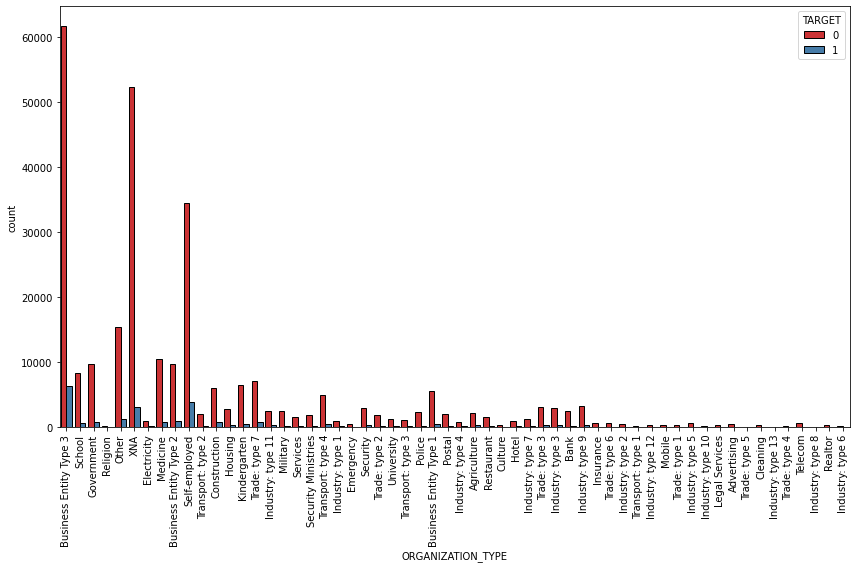

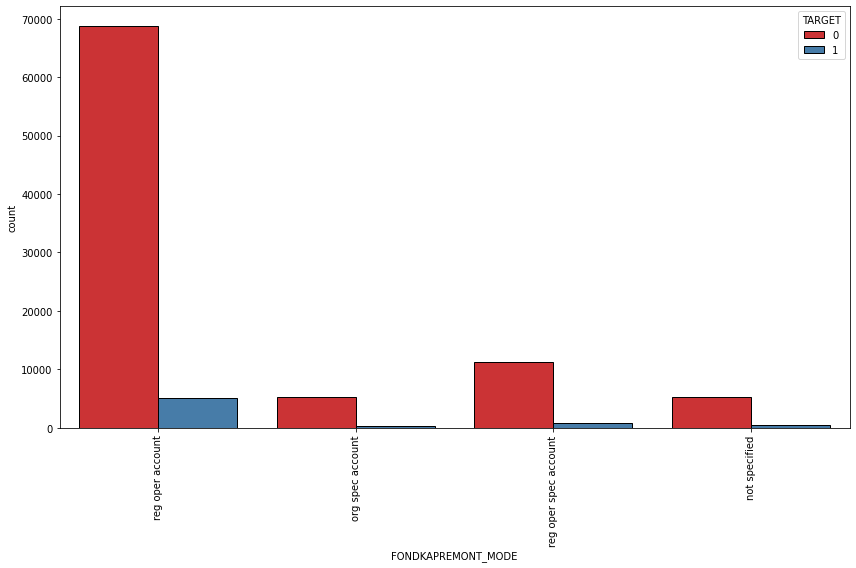

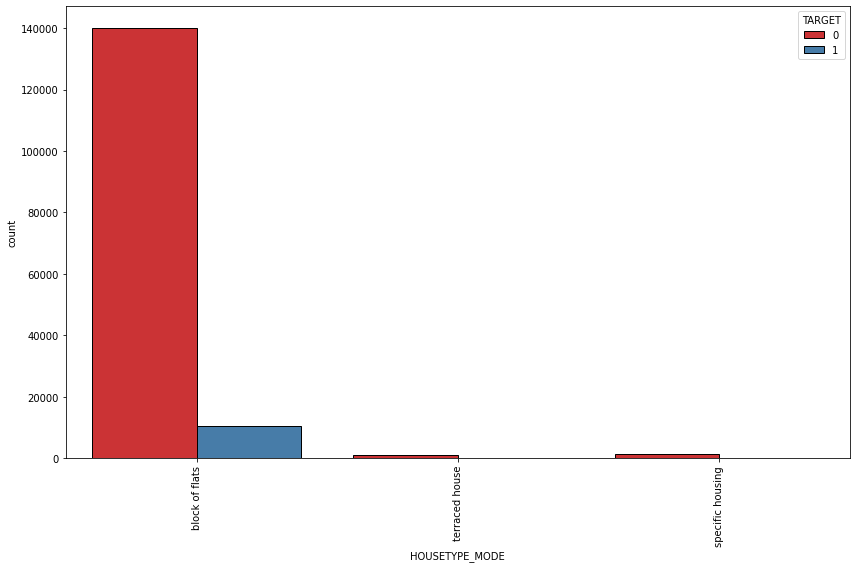

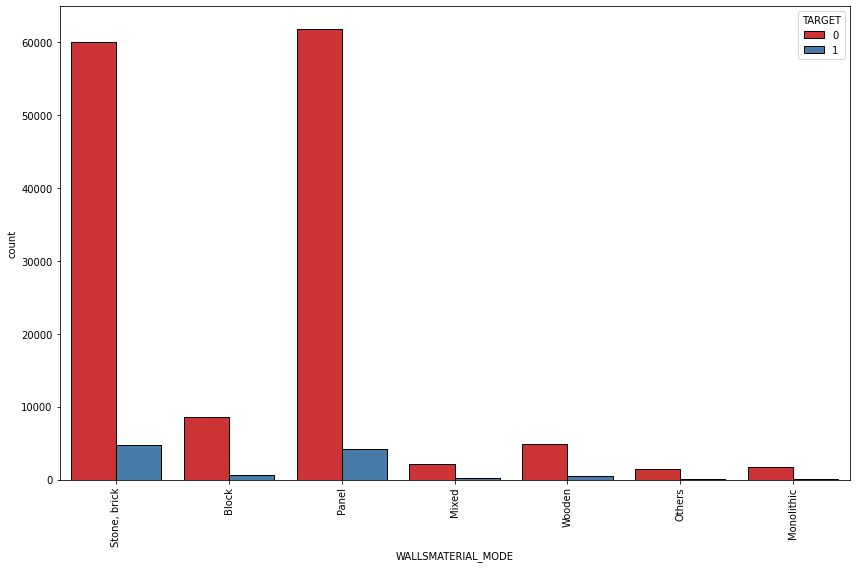

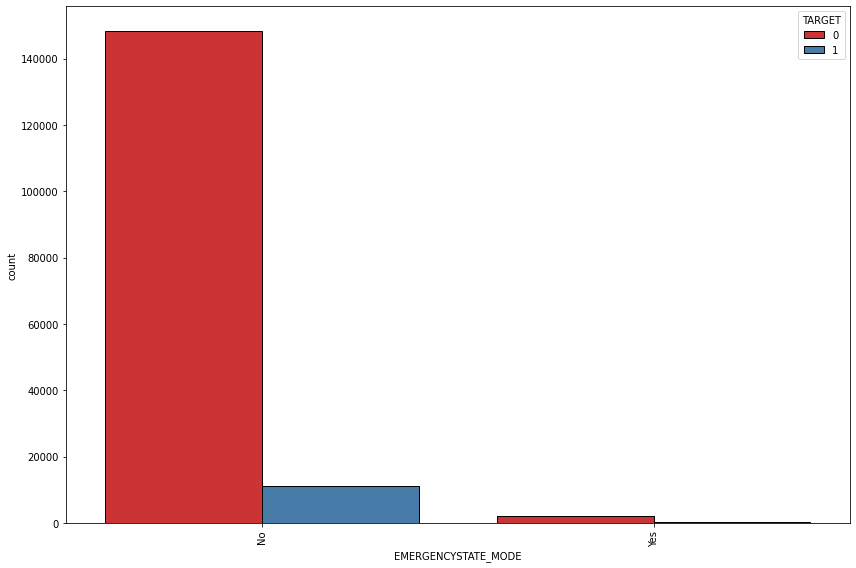

In [ ]:
# Categorical Columns vs Target
features = cats
for i in range(0, len(features)):
    plt.figure(figsize=(12,8))
    sns.countplot(data=df_train, hue='TARGET', x=features[i], palette='Set1')
    plt.xticks(rotation=90)
    plt.xlabel(features[i])
    plt.tight_layout()
plt.show()

In [ ]:
df2 = df_train.groupby(['TARGET','NAME_CONTRACT_TYPE']).agg({'SK_ID_CURR':'count'}).rename(columns={'SK_ID_CURR':'num_of_customers'}).reset_index()#,'mean','median'
df2

,TARGET,NAME_CONTRACT_TYPE,num_of_customers
0,0,Cash loans,255011
1,0,Revolving loans,27675
2,1,Cash loans,23221
3,1,Revolving loans,1604
